In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [29]:
data=pd.read_csv('C:/Users/LAHARI/Downloads/USA_Housing.csv')

In [30]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [31]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [33]:
data.shape

(5000, 7)

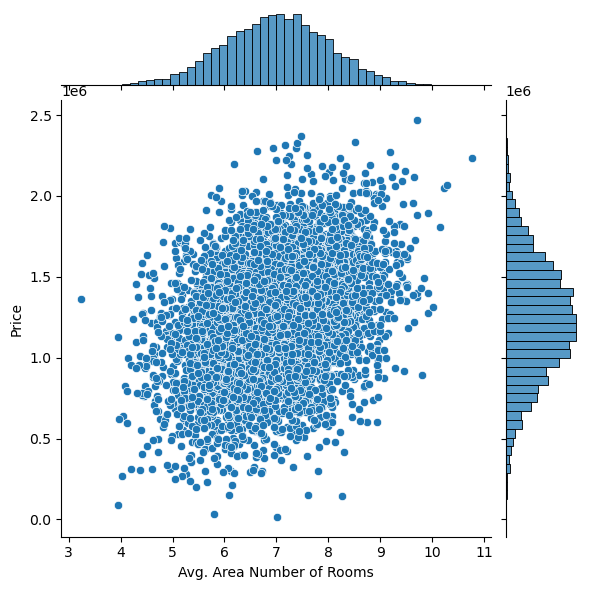

In [34]:
sns.jointplot(x= data["Avg. Area Number of Rooms"],y=data["Price"])

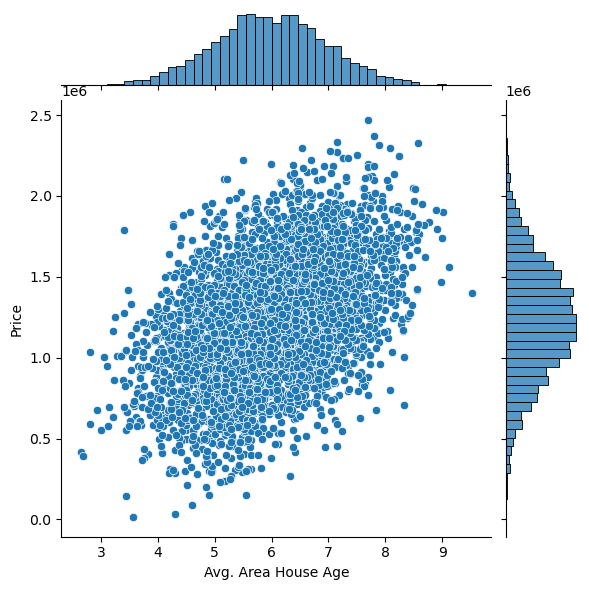

In [35]:
sns.jointplot(x= data["Avg. Area House Age"],y=data["Price"])

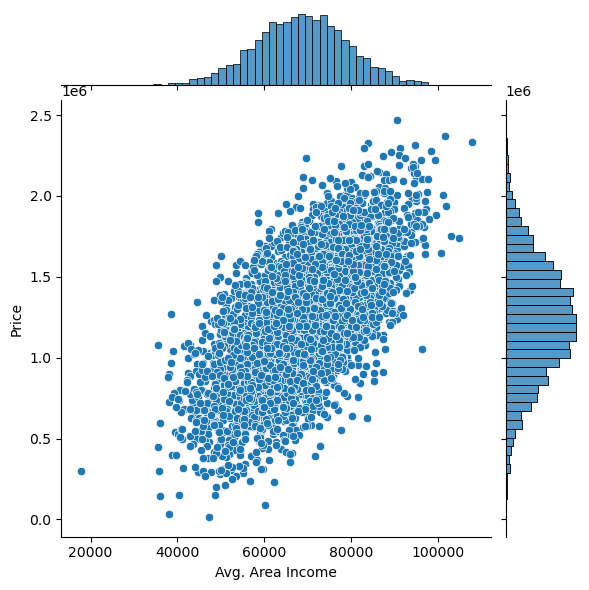

In [36]:
sns.jointplot(x= data["Avg. Area Income"],y=data["Price"])

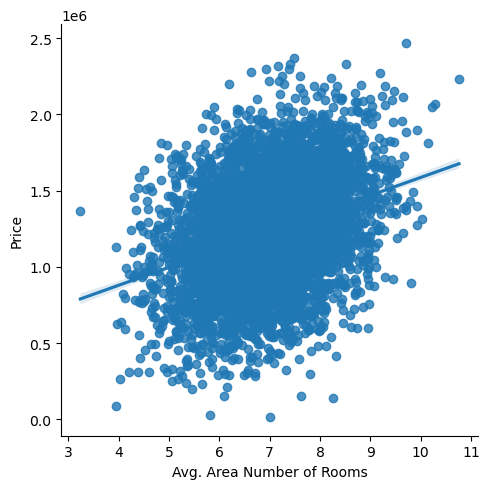

In [37]:
sns.lmplot(data=data,x="Avg. Area Number of Rooms",y="Price")

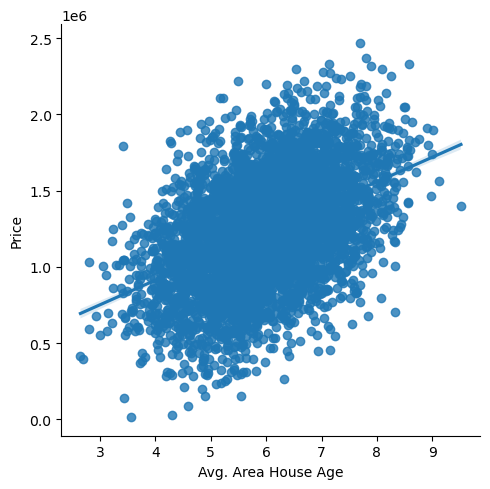

In [38]:
sns.lmplot(data=data,x="Avg. Area House Age",y="Price")

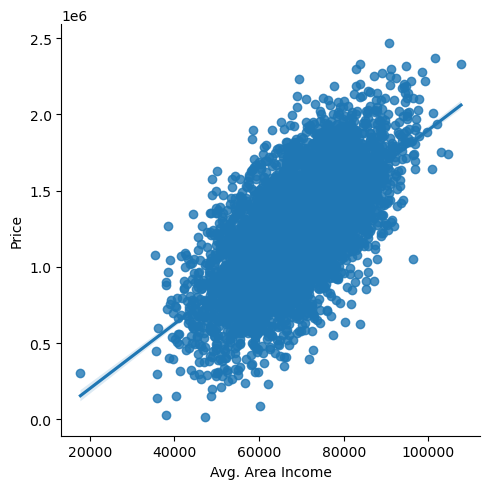

In [39]:
sns.lmplot(data=data,x="Avg. Area Income",y="Price")

In [40]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [41]:
X=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y=data['Price']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
lm = LinearRegression(copy_X = True,fit_intercept=True,n_jobs=1,normalize = False).fit(X,y)
lm

C:\Users\LAHARI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=1, normalize=False)

In [46]:
print("Coefficients:")
print(np.array(lm.coef_))

Coefficients:
[2.15827436e+01 1.65657872e+05 1.21598165e+05 1.51961198e+01]


In [47]:
a = lm.predict(X_test)

In [48]:
data = pd.DataFrame({"actual":y_test.squeeze(),"Predicted":a.squeeze()})

In [49]:
data.head()

,actual,Predicted
1718,1.251689e+06,1.257650e+06
2511,8.730483e+05,8.189616e+05
345,1.696978e+06,1.742360e+06
2521,1.063964e+06,9.720811e+05
54,9.487883e+05,9.901527e+05


<AxesSubplot:xlabel='actual', ylabel='Predicted'>

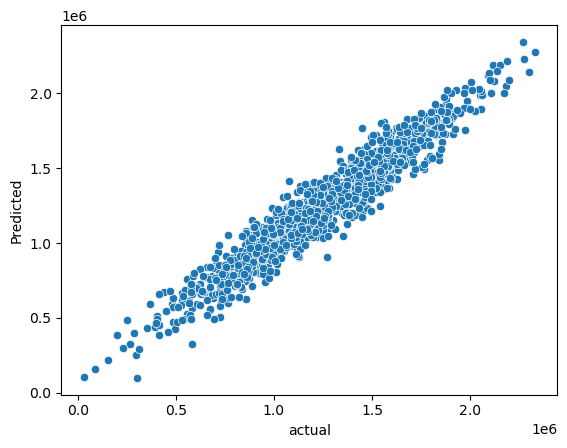

In [50]:
sns.scatterplot(data = data,x="actual",y="Predicted")

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
y_pred = lm.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [27]:
print(f'MAE :{mae}')
print(f'MSE :{mse}')
print(f'RMSE :{rmse}')

MAE :81194.26248511494
MSE :10166056584.567904
RMSE :100826.86439916647
